# Clustering de usuarios
Agrupar a los usuarios en función de las funciones de las matrices de similitud generadas

---

In [1]:
import numpy as np
import pandas as pd

In [2]:
users = pd.read_csv('data/Prado_users_similarity.csv', index_col=0)
prado_users = pd.read_csv('data/Prado_users_scaled.csv', index_col=0)

In [3]:
print(users.values)

[[1.         0.41624932 0.4998177  ... 0.48432265 0.61129644 0.71239333]
 [0.41624932 1.         0.52880061 ... 0.5312     0.61012621 0.64498932]
 [0.4998177  0.52880061 1.         ... 0.77063394 0.45602682 0.44778992]
 ...
 [0.48432265 0.5312     0.77063394 ... 1.         0.56332621 0.40738932]
 [0.61129644 0.61012621 0.45602682 ... 0.56332621 1.         0.52846311]
 [0.71239333 0.64498932 0.44778992 ... 0.40738932 0.52846311 1.        ]]


In [52]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(metric='precomputed', n_clusters=8)

In [53]:
%%capture output
kmedoids.fit(users)

In [54]:
import collections
collections.Counter(kmedoids.labels_)

Counter({3: 31, 5: 35, 7: 17, 6: 36, 1: 22, 2: 8, 4: 21, 0: 1})

In [55]:
kmedoids.medoid_indices_

array([  9,  73, 115, 136, 106,  63, 161, 129], dtype=int64)

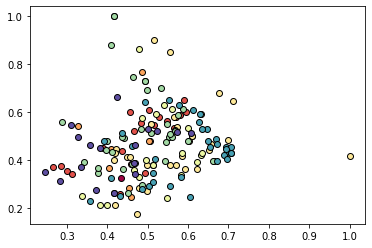

In [56]:
import matplotlib.pyplot as plt

labels = kmedoids.labels_
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = users.values[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

In [57]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(prado_users, kmedoids.labels_)

4.879045796828917

In [7]:
users_clustered = pd.read_csv("data/Prado_users.csv")
users_clustered['cluster'] = kmedoids.labels_

users_scaled_clustered = pd.read_csv("data/Prado_users_scaled.csv")
users_scaled_clustered['cluster'] = kmedoids.labels_

In [8]:
users_clustered.to_csv("data/Prado_users_clusters.csv", index=0)
users_scaled_clustered.to_csv("data/Prado_users_scaled_clusters.csv", index=0)

## ------

In [68]:
%%capture output

scores = []
labels = []

for i in range(2, 21):
  km = KMedoids(metric='precomputed', n_clusters=i)
  km.fit(users)
  scores.append(davies_bouldin_score(users, km.labels_))
  labels.append(km.labels_)

Num clusters: 2 Davies-Bouldin score: 2.5312117933537235


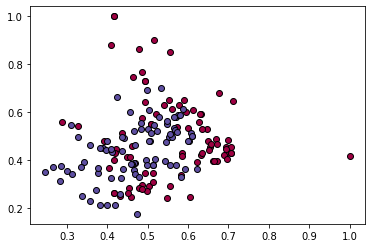

Num clusters: 3 Davies-Bouldin score: 3.13107343579534


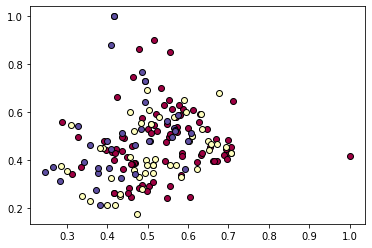

Num clusters: 4 Davies-Bouldin score: 2.5967805189417543


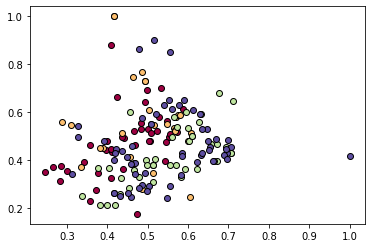

Num clusters: 5 Davies-Bouldin score: 3.998421659904392


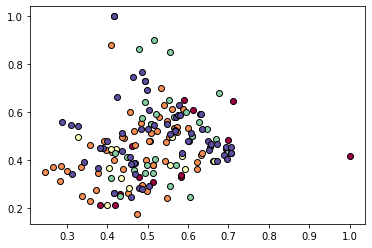

Num clusters: 6 Davies-Bouldin score: 3.9023373541732904


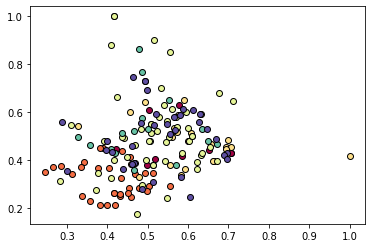

Num clusters: 7 Davies-Bouldin score: 2.7047921971815656


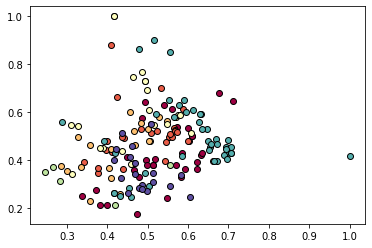

Num clusters: 8 Davies-Bouldin score: 3.2452561810987928


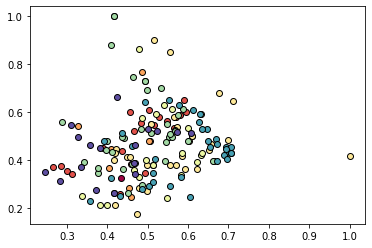

Num clusters: 9 Davies-Bouldin score: 2.5085373631408308


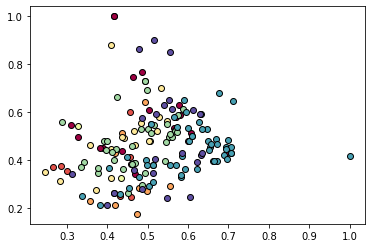

Num clusters: 10 Davies-Bouldin score: 2.981899060533715


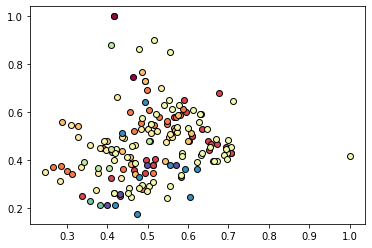

Num clusters: 11 Davies-Bouldin score: 2.374488633085563


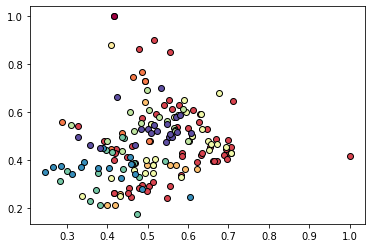

Num clusters: 12 Davies-Bouldin score: 2.49759135764132


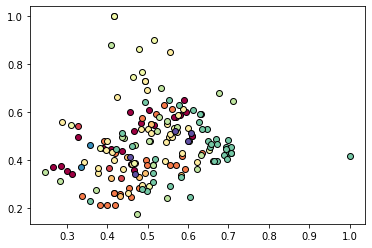

Num clusters: 13 Davies-Bouldin score: 2.8403536204190236


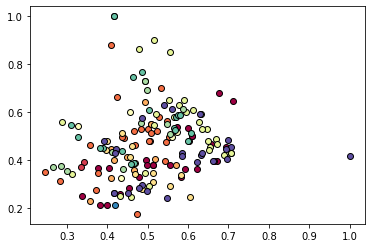

Num clusters: 14 Davies-Bouldin score: 2.5666040026923853


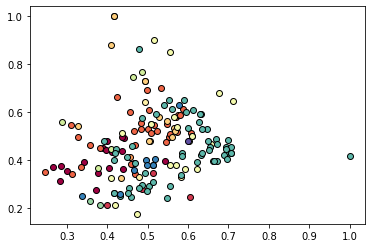

Num clusters: 15 Davies-Bouldin score: 2.7916708529881245


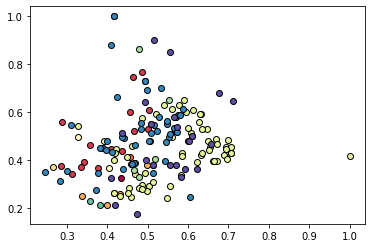

Num clusters: 16 Davies-Bouldin score: 3.058703801121835


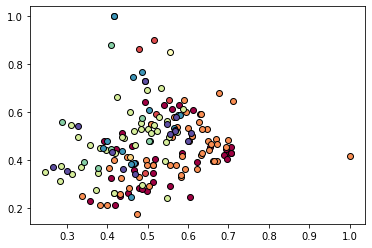

Num clusters: 17 Davies-Bouldin score: 3.113792719761707


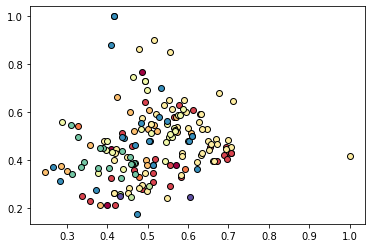

Num clusters: 18 Davies-Bouldin score: 2.783006630080951


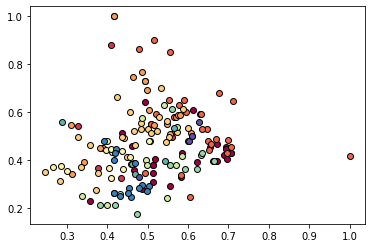

Num clusters: 19 Davies-Bouldin score: 2.327059610474274


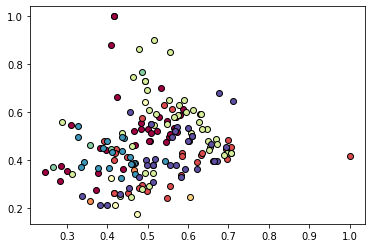

Num clusters: 20 Davies-Bouldin score: 2.719661822642363


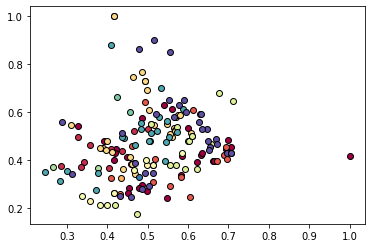

In [116]:
i_values = range(2, 21)
for i in range(len(scores)):
  print('Num clusters:', i_values[i], 'Davies-Bouldin score:', scores[i])
  unique_labels = set(labels[i])
  colors = [
      plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
  ]
  for k, col in zip(unique_labels, colors):

      class_member_mask = labels[i] == k

      xy = users.values[class_member_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6,
      )
  plt.show()